In [32]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [33]:
conda install -c conda-forge mlxtend

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - mlxtend


The following NEW packages will be INSTALLED:

  mlxtend            conda-forge/noarch::mlxtend-0.18.0-pyhd3deb0d_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [35]:
data=pd.read_csv("book1.csv")
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## As we don't have any categorical data we don't have to pre process the data, and null values are also not present

# Changing support minimun support threshold values and check in result

In [36]:
frequent_items=apriori(data,min_support = 0.04, use_colnames=True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(GeogBks, RefBks, YouthBks, ChildBks, CookBks)"
129,0.0465,"(GeogBks, YouthBks, ChildBks, ArtBks, CookBks)"
130,0.0450,"(GeogBks, RefBks, ChildBks, CookBks, DoItYBks)"
131,0.0535,"(GeogBks, ChildBks, ArtBks, CookBks, DoItYBks)"


# Apriori Algorithm

In [37]:
frequent_itemsets=apriori(data,min_support=0.005,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
1057,0.0060,"(ItalArt, ItalCook, RefBks, YouthBks, ItalAtla..."
1058,0.0050,"(ItalArt, ItalCook, GeogBks, RefBks, ChildBks,..."
1059,0.0065,"(ItalArt, ItalCook, RefBks, ItalAtlas, ChildBk..."
1060,0.0080,"(ItalArt, ItalCook, GeogBks, RefBks, ItalAtlas..."


## Create Association rules

In [38]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
35297,(RefBks),"(ItalArt, ItalCook, GeogBks, ItalAtlas, ArtBks...",0.2145,0.0050,0.005,0.023310,4.662005,0.003928,1.018747
35298,(ItalAtlas),"(ItalArt, ItalCook, GeogBks, RefBks, ArtBks, C...",0.0370,0.0055,0.005,0.135135,24.570025,0.004797,1.149891
35299,(ArtBks),"(ItalArt, ItalCook, GeogBks, RefBks, ItalAtlas...",0.2410,0.0050,0.005,0.020747,4.149378,0.003795,1.016081
35300,(CookBks),"(ItalArt, ItalCook, GeogBks, RefBks, ItalAtlas...",0.4310,0.0050,0.005,0.011601,2.320186,0.002845,1.006678


In [39]:
rules= association_rules(frequent_items,min_threshold=1,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1061,(GeogBks),"(CookBks, ChildBks, ArtBks, RefBks)",0.2760,0.0610,0.0405,0.146739,2.405560,0.023664,1.100484
1062,(RefBks),"(CookBks, ArtBks, GeogBks, ChildBks)",0.2145,0.0835,0.0405,0.188811,2.261212,0.022589,1.129823
1063,(ChildBks),"(CookBks, ArtBks, GeogBks, RefBks)",0.4230,0.0460,0.0405,0.095745,2.081406,0.021042,1.055012
1064,(ArtBks),"(CookBks, ChildBks, GeogBks, RefBks)",0.2410,0.0785,0.0405,0.168050,2.140762,0.021582,1.107638


In [40]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
317,(ItalArt),"(CookBks, ArtBks)",0.0485,0.1670,0.0410,0.845361,5.062041,0.032900,5.386733
316,"(CookBks, ArtBks)",(ItalArt),0.1670,0.0485,0.0410,0.245509,5.062041,0.032900,1.261115
60,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
61,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229
319,(ArtBks),"(ItalArt, CookBks)",0.2410,0.0410,0.0410,0.170124,4.149378,0.031119,1.155595
314,"(ItalArt, CookBks)",(ArtBks),0.0410,0.2410,0.0410,1.000000,4.149378,0.031119,inf
595,"(ItalCook, RefBks)","(CookBks, ChildBks)",0.0465,0.2560,0.0415,0.892473,3.486223,0.029596,6.919200
594,"(CookBks, ChildBks)","(ItalCook, RefBks)",0.2560,0.0465,0.0415,0.162109,3.486223,0.029596,1.137977
410,"(CookBks, YouthBks)","(ItalCook, ChildBks)",0.1620,0.0850,0.0460,0.283951,3.340595,0.032230,1.277845
415,"(ItalCook, ChildBks)","(CookBks, YouthBks)",0.0850,0.1620,0.0460,0.541176,3.340595,0.032230,1.826410


In [41]:
## To eliminate the reducdancy in rules
def to_list(i):
    return sorted(i)

data1=rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

data1=data1.apply(sorted)
return_rules=list(data1)
unique_rules=[list(m) for m in set(tuple(i) for i in return_rules)]

index_rules=[]
for i in unique_rules:
    index_rules.append(return_rules.index(i))

In [42]:
##Getting the rules without any redundancies
rules_without_redundancies=rules.iloc[index_rules,:]

In [43]:
##Getting rules without redundancies
rules_without_redundancies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
886,"(CookBks, YouthBks, GeogBks, ChildBks)",(DoItYBks),0.0830,0.282,0.0510,0.614458,2.178928,0.027594,1.862312
364,"(CookBks, YouthBks, RefBks)",(ChildBks),0.0775,0.423,0.0680,0.877419,2.074277,0.035218,4.707105
560,"(CookBks, ArtBks, RefBks)",(ChildBks),0.0700,0.423,0.0610,0.871429,2.060115,0.031390,4.487778
616,"(CookBks, ArtBks, ItalCook)",(ChildBks),0.0565,0.423,0.0455,0.805310,1.903806,0.021600,2.963682
700,"(CookBks, YouthBks, RefBks)",(DoItYBks),0.0775,0.282,0.0485,0.625806,2.219172,0.026645,1.918793
...,...,...,...,...,...,...,...,...,...
122,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081
176,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
314,"(ItalArt, CookBks)",(ArtBks),0.0410,0.241,0.0410,1.000000,4.149378,0.031119,inf
518,"(CookBks, ArtBks, ChildBks)",(DoItYBks),0.1265,0.282,0.0820,0.648221,2.298657,0.046327,2.041056


In [44]:
#Stored list of values of rules without duplicates
rules_without_redundancies.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
314,"(ItalArt, CookBks)",(ArtBks),0.0410,0.2410,0.0410,1.000000,4.149378,0.031119,inf
218,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
308,"(CookBks, ArtBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
756,"(CookBks, YouthBks, GeogBks)",(ArtBks),0.0970,0.2410,0.0560,0.577320,2.395517,0.032623,1.795683
...,...,...,...,...,...,...,...,...,...
16,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
66,(GeogBks),(Florence),0.2760,0.1085,0.0425,0.153986,1.419221,0.012554,1.053764
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
14,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408


In [45]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'lift')

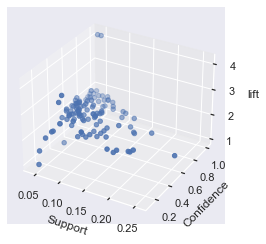

In [46]:
### Plotting 3D for the rules generated
fig1=plt.figure()
axis1=fig1.add_subplot(111,projection='3d')
axis1.scatter(rules_without_redundancies["support"],rules_without_redundancies["confidence"],rules_without_redundancies["lift"])
axis1.set_xlabel("Support")
axis1.set_ylabel("Confidence")
axis1.set_zlabel("lift")

In [47]:
#interactive 3d plot visualizing lift,support and confidence.
import plotly.express as px
fig = px.scatter_3d(rules_without_redundancies, x='support', y='confidence', z='lift',
                    color='consequents', opacity=0.7)
fig.show()

In [48]:
#changing min support values to 0.007 maximum items set to 3 this time.
frequent_items=apriori(data,min_support=0.007,max_len=3,use_colnames=True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
214,0.0130,"(ItalCook, GeogBks, Florence)"
215,0.0115,"(ItalArt, ItalAtlas, GeogBks)"
216,0.0090,"(ItalArt, GeogBks, Florence)"
217,0.0125,"(ItalArt, ItalCook, ItalAtlas)"


In [49]:
#defining Association rules again
rules=association_rules(frequent_items,min_threshold=1,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1023,"(ItalArt, Florence)",(ItalCook),0.0125,0.1135,0.0095,0.760000,6.696035,0.008081,3.693750
1024,"(ItalCook, Florence)",(ItalArt),0.0175,0.0485,0.0095,0.542857,11.192931,0.008651,2.081406
1025,(ItalArt),"(ItalCook, Florence)",0.0485,0.0175,0.0095,0.195876,11.192931,0.008651,1.221827
1026,(ItalCook),"(ItalArt, Florence)",0.1135,0.0125,0.0095,0.083700,6.696035,0.008081,1.077704


In [50]:
#Sorting rules based on lift.
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
927,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
930,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
977,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
976,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
964,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
...,...,...,...,...,...,...,...,...,...
18,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
65,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
64,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
51,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


In [51]:
##To eliminate the redundancy in rules
def to_list(i):
    return sorted(i)

data1=rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
data1=data1.apply(sorted)
return_rules=list(data1)
unique_rules=[list(m) for m in set(tuple(i) for i in return_rules)]

index_rules=[]
for i in unique_rules:
    index_rules.append(return_rules.index(i))

In [52]:
##Getting the rules without any redundancies
rules_without_redundancies=rules.iloc[index_rules,:]

In [53]:
#Stored list of values of rules without duplicates
rules_without_redundancies.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
566,"(ItalArt, YouthBks)",(ItalAtlas),0.0230,0.0370,0.0085,0.369565,9.988249,0.007649,1.527517
974,"(ItalArt, ArtBks)",(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
102,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
1016,"(ItalArt, ItalCook)",(ItalAtlas),0.0375,0.0370,0.0125,0.333333,9.009009,0.011113,1.444500
722,"(ItalArt, CookBks)",(ItalAtlas),0.0410,0.0370,0.0130,0.317073,8.569545,0.011483,1.410107
...,...,...,...,...,...,...,...,...,...
542,"(YouthBks, GeogBks)",(Florence),0.1205,0.1085,0.0165,0.136929,1.262023,0.003426,1.032940
410,"(CookBks, YouthBks)",(Florence),0.1620,0.1085,0.0200,0.123457,1.137851,0.002423,1.017063
18,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
64,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727


In [55]:
#Interactive  3d plot visualizing lift, support and confidence.
import plotly.express as px
fig=px.scatter_3d(rules_without_redundancies,x='support',y='confidence',z='lift',
                 color='consequents',opacity=0.7)
fig.show()

Text(0.5, 0, 'lift')

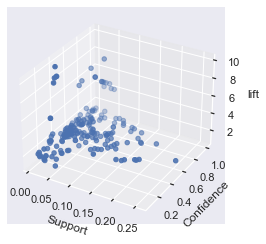

In [56]:
### Plotting 3D for the rules generated
fig2=plt.figure()
axis2=fig2.add_subplot(111,projection='3d')
axis2.scatter(rules_without_redundancies["support"],rules_without_redundancies["confidence"],rules_without_redundancies["lift"])
axis2.set_xlabel("Support")
axis2.set_ylabel("Confidence")
axis2.set_zlabel("lift")